In [2]:
def KKN(X,Y,test_point,K=5):
    res=[]
    
    for i in range(X.shape[0]):
        x=X[i]
        dist=(np.sum((x-test_point)**2)**0.5)
        res.append((dist,Y[i]))
    
    res=sorted(res)
    res=np.array(res[:K])
    labels=np.unique(res[:,1],return_counts=True)
    ind=np.argmax(labels[1]) 
    return int(labels[0][ind])

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [4]:
df=pd.read_csv("mnist_train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data=df.values
data.shape

(42000, 785)

In [6]:
X=data[:,1:]
Y=data[:,0]

print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [7]:
from sklearn import model_selection as ms

In [8]:
X_train,X_test,Y_train,Y_test=ms.train_test_split(X,Y,random_state=0)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(31500, 784)
(31500,)
(10500, 784)
(10500,)


In [13]:
def draw_image(X,Y,i):
    plt.imshow(X[i].reshape(28,28),cmap="gray")
    plt.title("Label: "+str(Y[i]))
    plt.axis("off")
    plt.show()

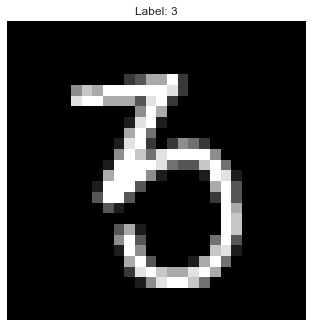

In [14]:
draw_image(X,Y,90)

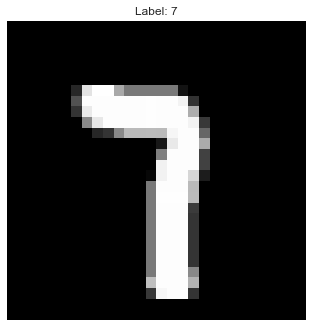

In [29]:
draw_image(X_test,Y_test,45)

In [30]:
KKN(X_train,Y_train,X_test[45])

7.0


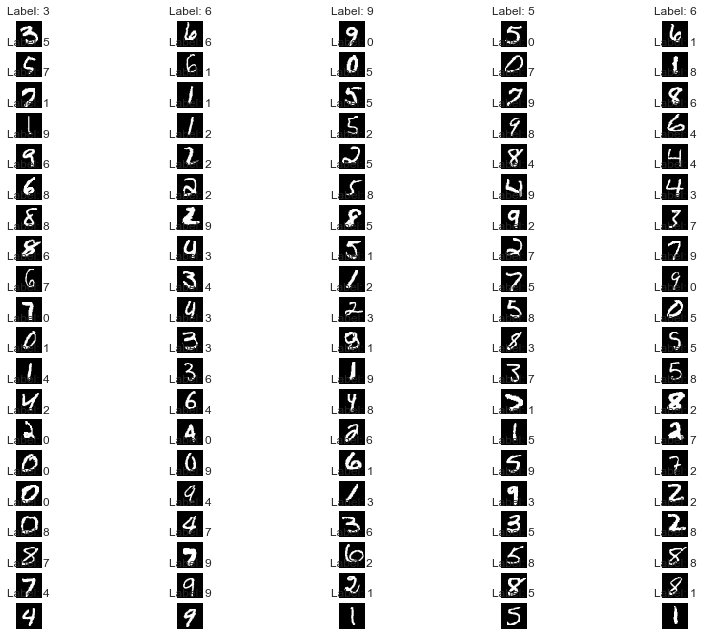

In [41]:
plt.figure(figsize=(14,14))
for i in range(100):
    plt.subplot(25,5,i+1)
    plt.imshow(X_test[i].reshape(28,28),cmap="gray")
    r=KKN(X_train,Y_train,X_test[i])
    plt.title("Label: "+str(r))
    plt.axis("off")
plt.show()